# Table of Contents
 <p><div class="lev1 toc-item"><a href="#notebook-initialization-code" data-toc-modified-id="notebook-initialization-code-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>notebook initialization code</a></div><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1 toc-item"><a href="#Basic-usage" data-toc-modified-id="Basic-usage-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Basic usage</a></div><div class="lev1 toc-item"><a href="#figurefirst-architecture" data-toc-modified-id="figurefirst-architecture-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>figurefirst architecture</a></div><div class="lev1 toc-item"><a href="#Using-inkscape-to-prepare-a-layout" data-toc-modified-id="Using-inkscape-to-prepare-a-layout-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Using inkscape to prepare a layout</a></div><div class="lev2 toc-item"><a href="#Installing-extensions" data-toc-modified-id="Installing-extensions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Installing extensions</a></div><div class="lev2 toc-item"><a href="#Tagging-Axes" data-toc-modified-id="Tagging-Axes-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Tagging Axes</a></div><div class="lev2 toc-item"><a href="#Using-the-xml-editor" data-toc-modified-id="Using-the-xml-editor-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Using the xml editor</a></div><div class="lev1 toc-item"><a href="#FigureFirst-tags" data-toc-modified-id="FigureFirst-tags-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>FigureFirst tags</a></div><div class="lev2 toc-item"><a href="#figurefirst:axis" data-toc-modified-id="figurefirst:axis-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>figurefirst:axis</a></div><div class="lev3 toc-item"><a href="#projections" data-toc-modified-id="projections-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>projections</a></div><div class="lev3 toc-item"><a href="#axis-methods" data-toc-modified-id="axis-methods-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>axis methods</a></div><div class="lev2 toc-item"><a href="#figurefirst:group" data-toc-modified-id="figurefirst:group-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>figurefirst:group</a></div><div class="lev2 toc-item"><a href="#figurefirst:figure" data-toc-modified-id="figurefirst:figure-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>figurefirst:figure</a></div><div class="lev2 toc-item"><a href="#figurefirst:pathspec-/-figurefirst:patchspec" data-toc-modified-id="figurefirst:pathspec-/-figurefirst:patchspec-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>figurefirst:pathspec / figurefirst:patchspec</a></div><div class="lev2 toc-item"><a href="#figurefirst:svgitem" data-toc-modified-id="figurefirst:svgitem-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>figurefirst:svgitem</a></div><div class="lev1 toc-item"><a href="#FigureFirst-architecture" data-toc-modified-id="FigureFirst-architecture-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>FigureFirst architecture</a></div><div class="lev2 toc-item"><a href="#Minimal-layout-document" data-toc-modified-id="Minimal-layout-document-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Minimal layout document</a></div><div class="lev1 toc-item"><a href="#Tricks-and-tips" data-toc-modified-id="Tricks-and-tips-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Tricks and tips</a></div><div class="lev1 toc-item"><a href="#Using-pathspec-and-patchspec" data-toc-modified-id="Using-pathspec-and-patchspec-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Using pathspec and patchspec</a></div>

# notebook initialization code

Note: figurefirst is a work in progress and should be considered an alpha version. This means  that much of the api, as well as this tutorial is unfinished and likely to change.

In [1]:
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png' #svg
import matplotlib.pyplot as plt # this notebook is for plotting
#import pylab as plt
import numpy as np
import figurefirst as fifi
from IPython.display import display,SVG

# Introduction

Constructing figures for publication in scientific journals requires some attention to details of styling and layout. Although there are a few computing libraries that provide mechanisms for layout specification via code, graphical decisions are difficult to evaluate using a strictly text-oriented approach. A number of commercial software packages such as matlab and sigma plot provide some graphical tools to assist in figure layout, however these tools do not compare to those available in vector graphics software such as Inkscape or Adobe Illustrator. For instance, figure 1A shows the steps we might follow to construct a figure with python without the figure first library. Thus, the figures produced by data analysis software often require quite a bit of adjustment in one of these more capable graphics programs prior submission. These adjustments can be  especially important in cases where journals have figure or length constraints and maximizing space is of paramount importance. 

Though the traditional work-flow may be suitable in many cases, it suggests a rather uni-directional process: an experiment is designed, data are collected, analyzed, a manuscript is written, and the analyzed data are assembled into a final figure sequence. Experience has shown that science rarely advances in such a linear manner; new data are collected, analyses are revised and even new experiments are conceived well after the writing process as commenced. Indeed, some authors suggest initiating the process of manuscript assembly at the most preliminary findings[whitesides ref] and revision is a forgone conclusion of peer review.

The ```figurefirst``` library seeks to solve this problem by allowing effort devoted to the raw analysis and raw presentation of data to proceed *in parallel* and *independent to* the work styling and formating the figure. The approach we take is to facilitate passing graphical information from the  <a href="https://www.w3.org/TR/SVG/">open-standard</a> scalable vector graphics (svg) file format into objects consumable by the open-source <a href="http://matplotlib.org/">matplotlib</a> python plotting library. This allows authors to take advantage of sophisticated SVG editors such as inkscape to start constructing final-form figures early in the process of manuscript preparation, while retaining the freedom to collect new data and revise analysis (Fig. 1B).

# Basic usage

With `figurefirst` creating a new figure generally involves four steps:

1.	Design the layout file. Fundamentally this means decorating a specific subset of the objects in the svg files with xml tags that identify what objects are something ```figurefirst``` should expose to Python.
2.	Convert the information in the graphical svg objects into python objects. This is accomplished via the ```figurefirst FigureLayout``` class.
3.	Plot data, taking advantage of the objects created by ```figurefirst``` to style and organize the figure.
4.	Merge newly created matplotlib figures with the original layout file and save to svg.

As an example, consider constructing a five-panel figure with non-uniform axes sizes. The documentation to the matplotlib gridspec v.xx module <a href="http://matplotlib.org/users/gridspec.html">   </a> provides one such example (figure xxx A).

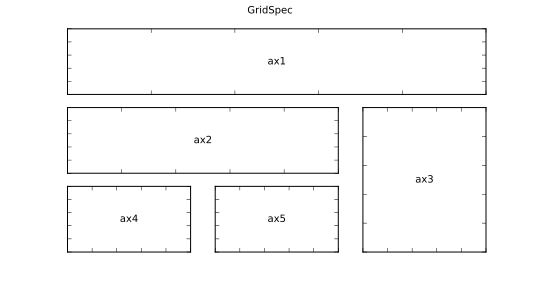

In [3]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize = (7.5,4.0))

def make_ticklabels_invisible(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        for tl in ax.get_xticklabels() + ax.get_yticklabels():
            tl.set_visible(False)

gs = GridSpec(3, 3)
ax1 = plt.subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0,0), colspan=3))
ax2 = plt.subplot(gs[1,:-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1,0])
ax5 = plt.subplot(gs[-1,-2])

plt.suptitle("GridSpec")
make_ticklabels_invisible(plt.gcf())
plt.close('all')
fig.savefig('fiveax_gridspec.svg')
display(SVG('fiveax_gridspec.svg'))

To construct a similar plot in figurefirst, we would use Inkscape to draw five boxes in an svg layout document Figure xx B. This layout document would specify the total dimensions of the figure (7.5 by 4.0 in) as well as the placement and aspect ratio of the axes. Also, rather than specify the labels programmatically in python we have included them on a separate layer in svg. It is also worth noting  that this layout is a bit different than the output of `GridSpec`: ax2-5 are visually offset from ax1, and the label placement is less-ridged. We have done this pointedly to illustrate an advantage of using a layout -- this more flexible axes placement would be far more challenging to implement in code that with the tools available in inkscape.

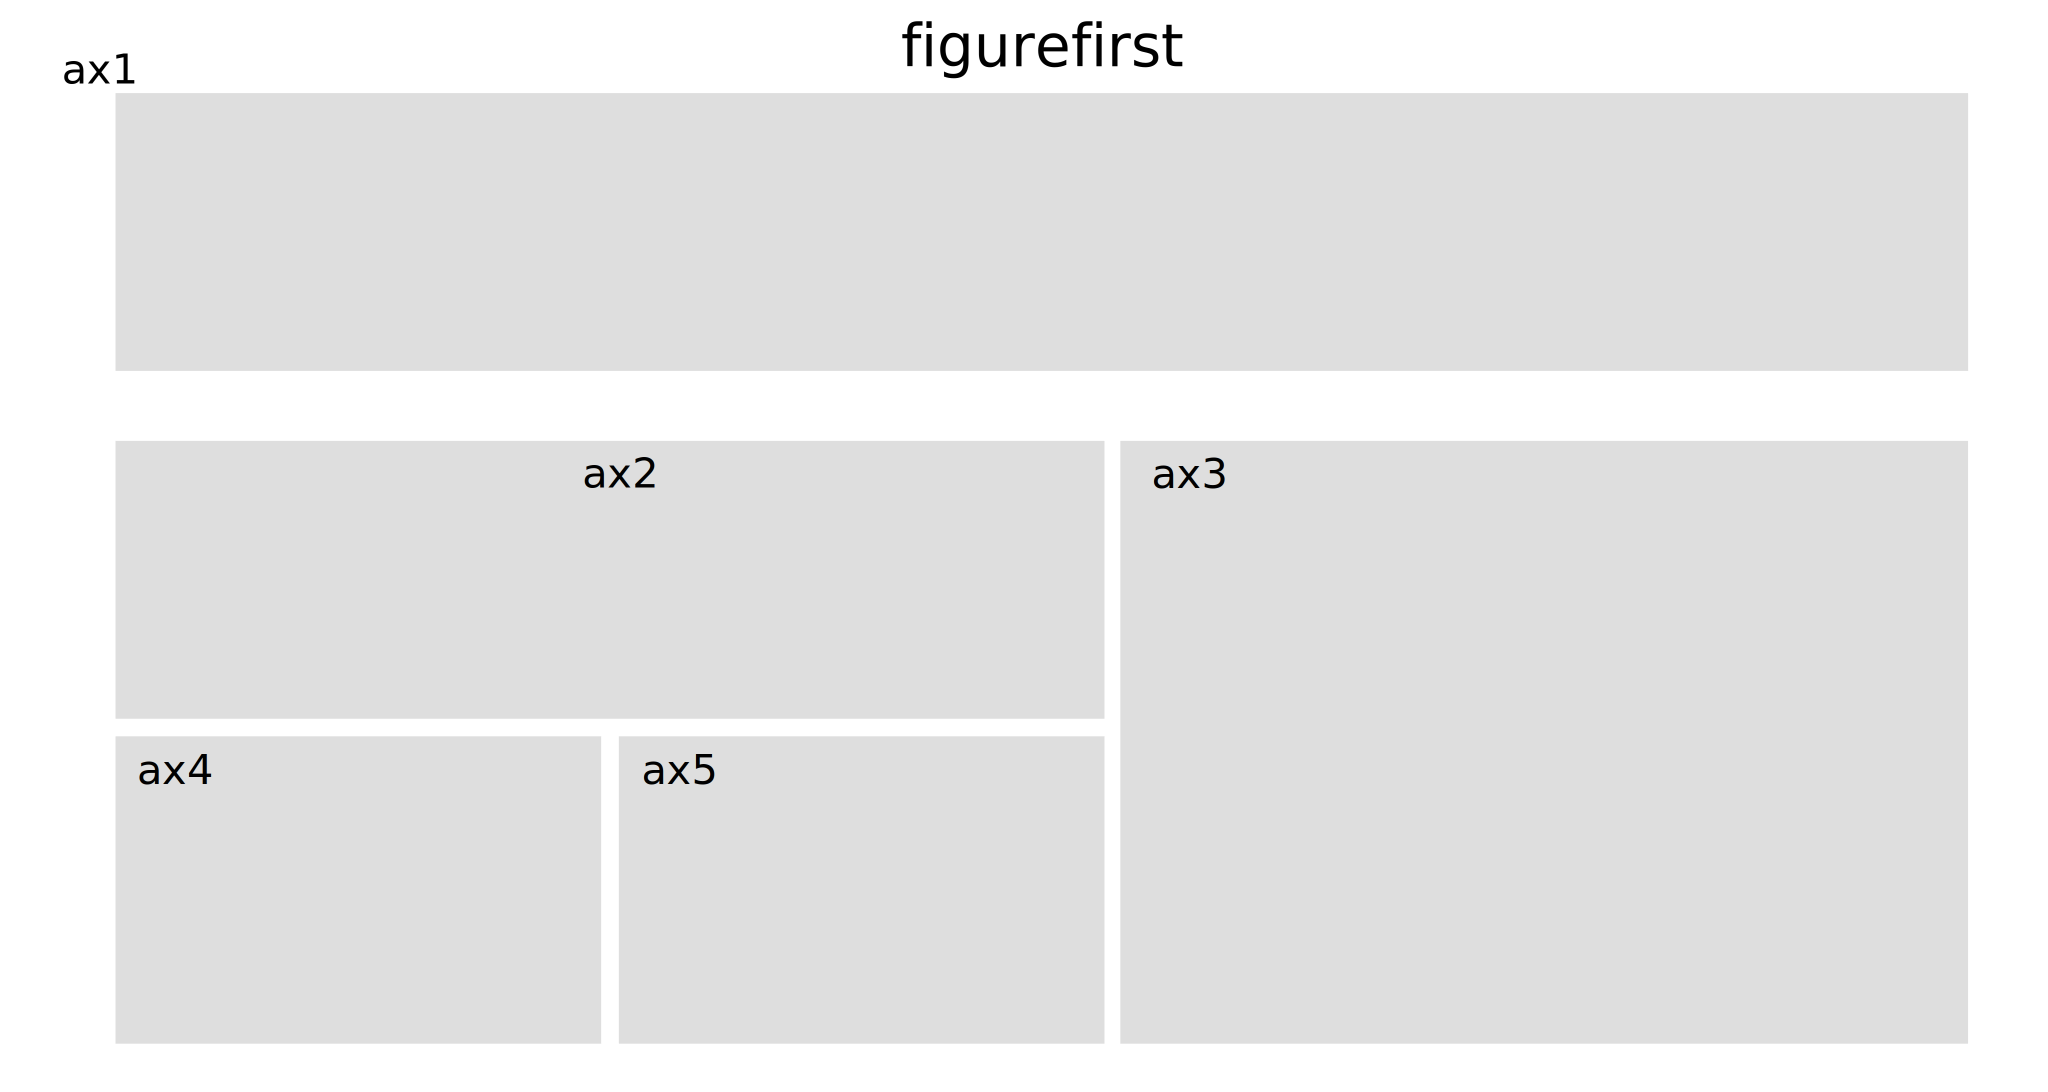

In [4]:
display(SVG('fiveax_layout.svg'))

In order to tell figurefirst what boxes in the svg layout document to convert to matplotlib axes, the user must tag each axis with a `<figurefirst:axes>` xml tag that contains the xml attribute `<figurefirst:name = axis_name>`. In python, the user then loads this layout document by constructing a `FigureLayout` object, passing the file path to the layout document. The FigureLayout.make_mplfigures() method will then use the information contained in the layout  to generate a matplotlib Figure and associated axes to match the layout. References to the generated matplotlib objects are stored within python dictionary attached to the FigureLayout object. The individual axes are accessible in these dictionaries using keys that match the figurefirst:name attribute of the xml tag. 

Since a figure may contain many graphical elements that would clutter the variable namespace, if they were all converted into python variables we require that the user add xml tags to the elements they wish to expose via the figurefirst python interface. To streamline this process we have included a number of inkscape extensions as part of the figurefirst project. This tagging procedure also allows the user to specify the type of python object that figurefirst will create from the taged and the name of this object. 

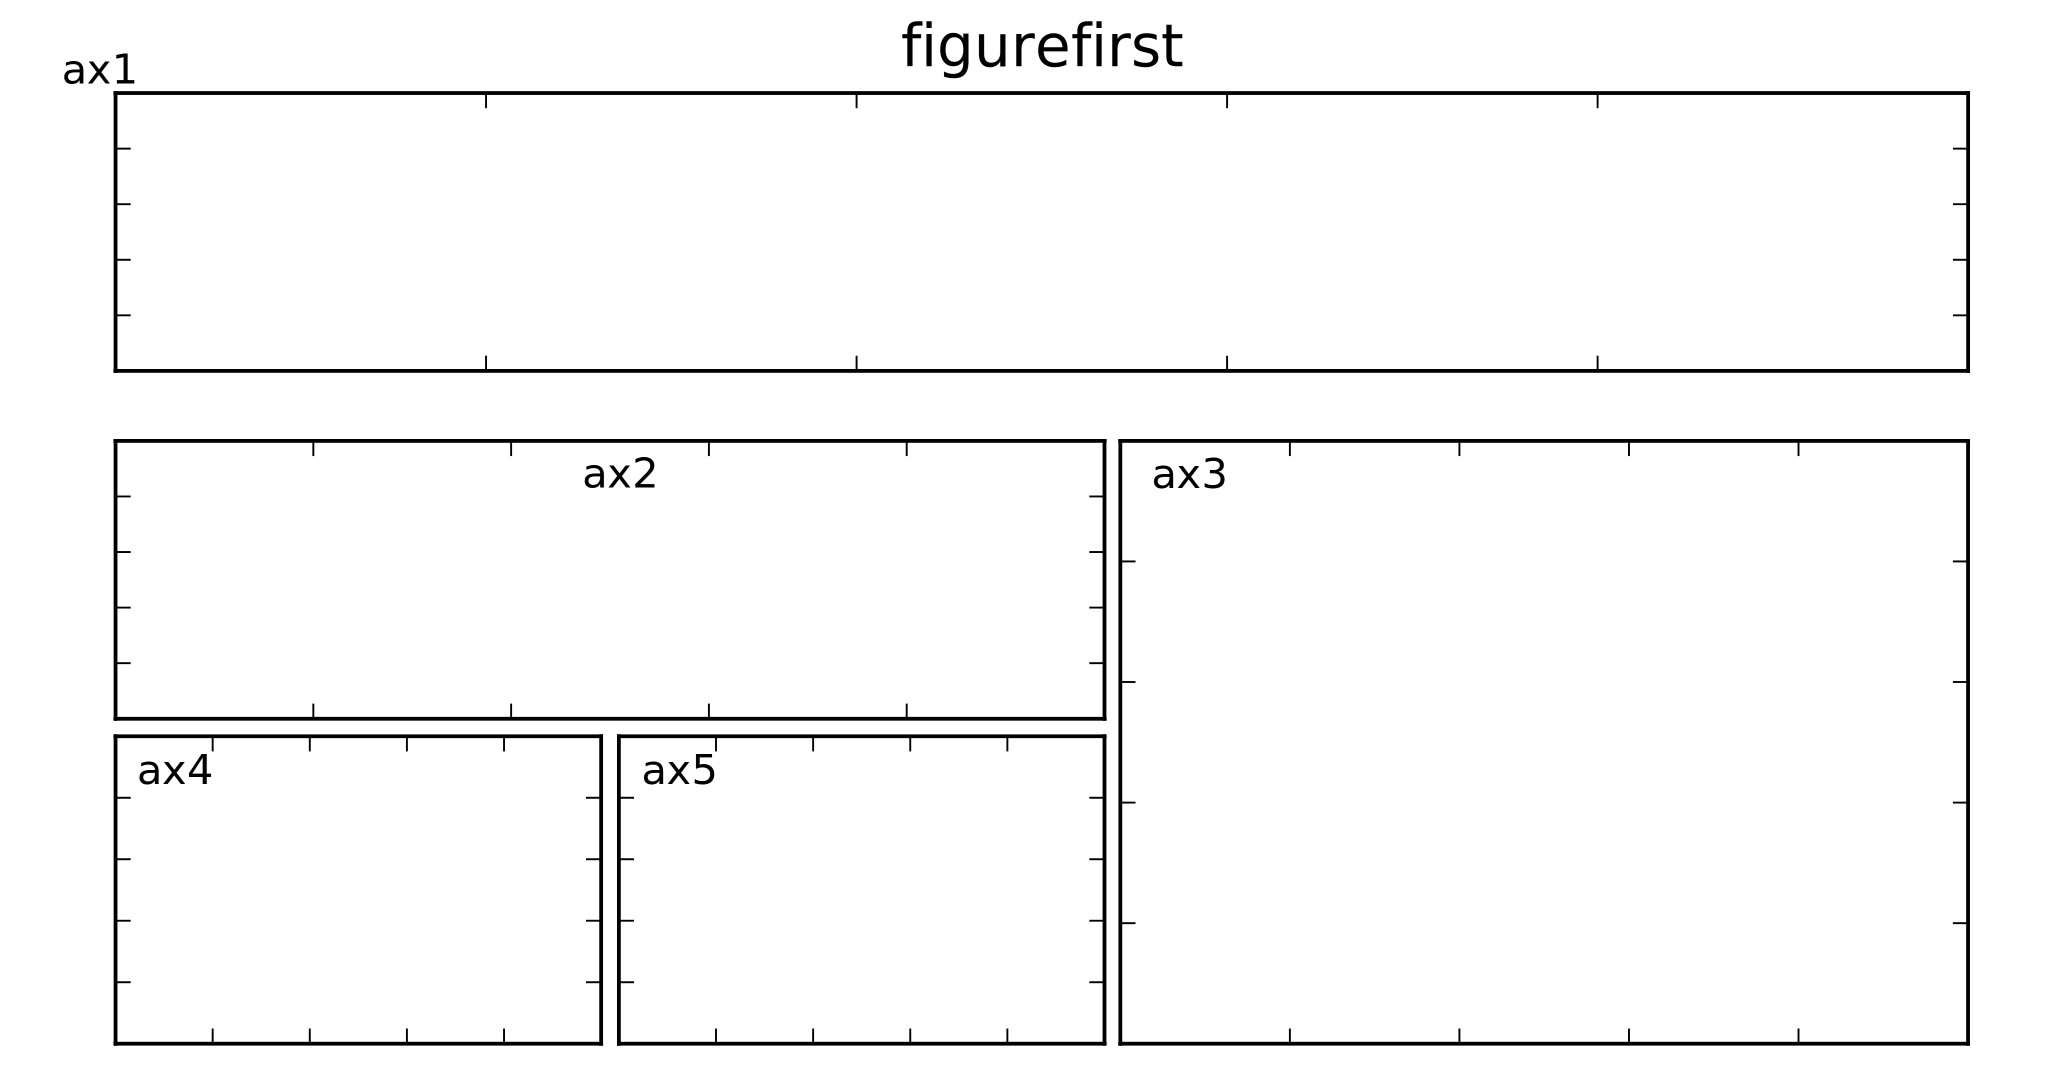

In [5]:
layout = fifi.FigureLayout('fiveax_layout.svg')
layout.make_mplfigures()
fifi.mpl_functions.kill_all_labels(layout)
layout.set_layer_visibility('Layer 1',False)
layout.save('fiveax_test_output.svg')
plt.close('all');display(SVG('fiveax_test_output.svg'))

# figurefirst architecture

When constructing a FigureFirst.FigureLayout, figurefirst parses the SVG document and transforms tagged SVG elements into a python object that holds the key graphical data specified by SVG. For instance, as mentioned above, a box tagged with `<figurefirst:axes>` will be used to create a figurefirst.Axes object that contains the x,y position of the origin, as well as the height and width of the tagged box. FigureFirst axes objects are organized within a grouping hierarchy (Fig xxx) specified by the svg groups or inkscape layers that enclose the tagged box. Like the axes, these groups and layers are exposed to FigureFirst using xml tags:  `<figurefirst:group>` and `<figurefirst:figure>` respectively. 

We use inkscape layers as the top level of the grouping hierarchy, each layer will generate a new matplotlib figure instance that will hold the enclosed `<figurefirst:axes>` objects - the dimensions of these figures are determined by the dimensions of the svg document. Additional levels of grouping are specified by tagging groups with the `<figurefirst:group>` tag. In the case that a `<figurefirst:figure>` tag is not indicated, all the axes of the document are collected into the default figure with the name 'none'. 

The `<figurefirst:figure>` tag can also be used at the level of groups and individual boxes to support figure templates. Templates (Fig xxx) allow a sub-layout prototype to be replicated multiple times within the context of a larger document. To use templates a group of `<figurefirst:axes>` boxes is tagged with a `<figurefirst:figure>` tag. This template is then targeted to single boxes that are then tagged with the `<figurefirst:figure>` that contains a `figurefirst:name` attribute indicating the name of the template to use. The template is then scaled and translated to fit within the bounds of the target.

In [4]:
10/3.75

2.6666666666666665

First, in line 1, we pass the name of the layout file to the ```FigureLayout``` constructor, this causes ```figurefirst``` to load the svg from the layout file.

In line 2 we call the ```make_mplfigures()``` method. This generates a matplotlib figure and populates the figure with axes as specified by the layout. 

After the call to ```layout.make_mplfigures()``` we then have access to a dictionary of matplotlib figures in the axes attribute of the layout object. The keys in this dictionary come from the data we passed in via xml. We can then treat these objects like any other maplotlib axis -- plotting data to them if we wish. Here in line 3 we simply pass them to the ```kill_labels()``` function to remove the tick labels.

When we are done plotting and manipulating the axes objects, in line 5 we send the results back into a target svg layer, merging the graphical elements in the layout with those produced by matplotlib in a virtual svg file stored in memory. Since the results of matplotlib get sent into a separate layer, we can remove or hide unwanted elements from the layout like those grey boxes we used to specify the axes using ```layout.set_layer_visability('Layer 1',False)```.

Finally, in line 6 we write the results of the virtual, merged svg file to a new svg document 'fiveax_test_output.svg'.

# Using inkscape to prepare a layout

inkscape extensions are intended to make decorating svg objects with figurefirst tags easier.

## Installing extensions

to install the inkscape extensions copy the .inx and .py files from the inkscape_extensions directory to:

 ``` ~/.config/inkscape/extensions/ ```
(ubuntu or osx)

``` C:\Program Files\Inkscape\share\extensions ```
(windows)

## Tagging Axes

To specify an axes we use the rectangle tool to draw a box where we want our axis and then tag the box with a name that will be exposed in python. To do this open the tagaxis dialog from the figurefirst menu. Select the box we want to tag, indicate the name we want for the axes and then select apply.<img src=tag_dialogue.png  style="width:400px;"/>



     
This will add the following xml to the svg document within the ```<rect>``` that you drew:

```xml
<figurefirst:axis
     figurefirst:name="ax1"/> ```
     
In complicated layouts, editing the raw xml with a text editor is more than inconvenient, fortunately inkscape comes with a nice xml tool to edit the tags if needed.

## Using the xml editor

You can check the result of the tagging procedure using the xml editor. Here you can change the name of the tag or add any additional attributes, such as a projection or axis methods (see below)
. Note that our tagging as inserted a ```figurefirst:axes``` object with a ```figurefirst:name=ax1``` attribute within the ```<svg:rect>``` that we selected.

<img src='xml_editor.png' style="width:400px;">


We have tried to create extensions for most of the basic figurefirst functionality but for some features, and for troubleshooting the xml editor is still required.

# FigureFirst tags

## figurefirst:axis

Specifies a the position, height and width of a axis element. Should be applied to a rectangle in svg. These objects will be exposed in the layout document in the layout.axes and layout.axes_groups dictionaries. The method layout.makemplaxes() will create a separate axis for each rectangle tagged figurefirst:axes. The tag must contain a figurefirst:name attribute that will be used as the key referencing the axes in the layout.axes and layout.axes_groups dictionaries.

### projections
The matplotlib axis constructed by layout.makemplaxes() will by default have a rectilinear projection. If  you wish to generate something else (e.g. a polar plot) then you must specify the projection using the ```figurefirst:projection``` tag. e.g. ```figurefirst:projection='polar'```.
<img src= 'polar_example.png' style='width:400px'>

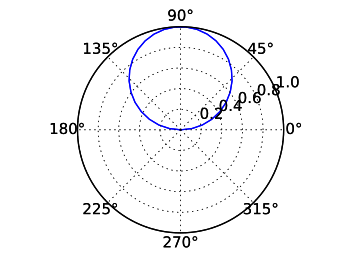

In [6]:
reload(fifi)
layout = fifi.FigureLayout('../example_polarprojection_layout.svg')
layout.make_mplfigures()
layout.axes['ax1'].plot(np.linspace(0,np.pi,30),np.sin(np.linspace(0,np.pi,30)))
layout.insert_figures()
layout.set_layer_visibility('Layer 1',False)
layout.save('polar_example.svg')
plt.close('all')
display(SVG('polar_example.svg'))

### axis methods
The ```layout``` object has a ```layout.apply_mpl_methods()``` function that will call any conforming axis method on the created matplotlib function. For example to call:

```python
ax.axhspan(100,200,zorder=10,color ='r',alpha = 0.3)
``` 

on an axis named ```frequency.22H05.start``` use the following ```figurefirst:axis``` tag:

```xml
<figurefirst:axis
     figurefirst:name="frequency.22H05.start"
     figurefirst:axhspan="100,200,zorder=10,color='r',alpha=.3"/> ```
     
The layout.apply_mpl_methods function will then apply the methods passing the value of the svg atribute as arguments to the ```mpl.axis``` method.

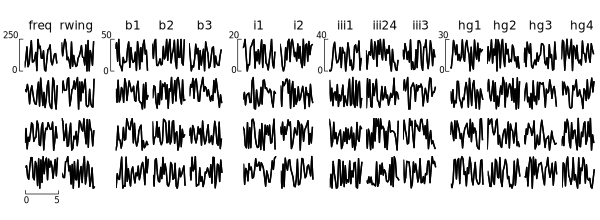

In [7]:
#Passing axis methods
import numpy as np
layout = fifi.FigureLayout('../example_axis_methods_layout.svg')
layout.make_mplfigures()
layout.fig.set_facecolor('None')
for mplax in layout.axes.values():
    ax = mplax['axis']
    ax.plot(np.arange(30),np.random.rand(30),color = 'k')
    fifi.mpl_functions.adjust_spines(ax,'none', 
                  spine_locations={}, 
                  smart_bounds=True, 
                  xticks=None, 
                  yticks=None, 
                  linewidth=1)
    ax.patch.set_facecolor('None')
layout.apply_mpl_methods()
layout.insert_figures('mpl_panel_a')
layout.set_layer_visibility('Layer 1',False)
layout.save('axis_methods_test_output.svg')
plt.close('all')
display(SVG('axis_methods_test_output.svg'))

## figurefirst:group

It is also possible to add figurefirst attributes to svg groups. Providing the ```figurefirsrt:groupname = "mygroup"``` attribute will cause the enclosed figurefirst:axes elements to be added to the layout.axes_groups dictionary keyed by groupname, and then axis name. For instance, if the follwing group exists in svg:

```xml
  <g
       style="display:inline"
       transform="matrix(0.88667385,0,0,0.84804291,-1.1136586,117.0766)"
       id="g3965-1"
       figurefirst:groupname="oval">
       <rect
         y="34.986671"
         x="70.899071"
         height="42.857143"
         width="594.55908"
         id="rect2985-3-0"
         style="fill:#008000">
        <figurefirst:axis
           figurefirst:name="circadian" />
        </rect>
   </g>
```
python will expose the axis in the dictionary axis groups attached to the layout keyed by group name and axis name.
```python
layout.axes_groups['oval']['circadian']
``` 
All axes that are not included in a group  will be collected into the field
```python
layout.axes_groups['none']
```

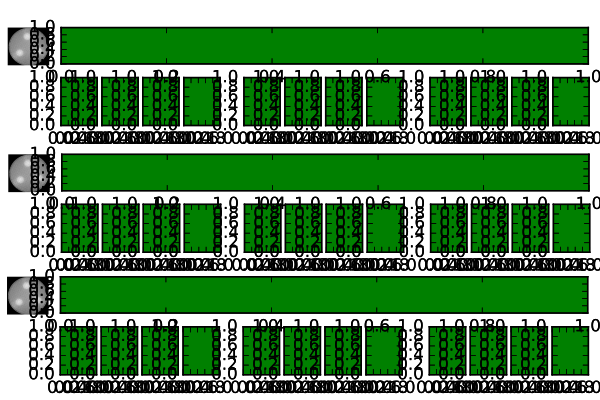

In [8]:
#Group axes example
layout = fifi.FigureLayout('../example_group_axes_layout.svg')
layout.make_mplfigures()
layout.insert_figures()
layout.save('group_axes_test_output.svg')
plt.close('all')
display(SVG('group_axes_test_output.svg'))

## figurefirst:figure
todo

## figurefirst:pathspec / figurefirst:patchspec
todo

## figurefirst:svgitem

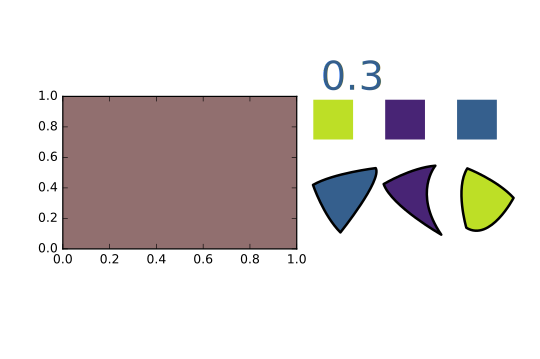

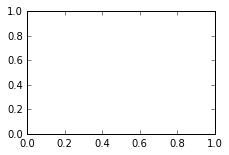

In [5]:
reload(fifi)
layout = fifi.FigureLayout('example_svgitem_layout.svg')
layout.make_mplfigures()
cdict1 = {'r1':0.3,'r2':0.1,'r3':0.9}
cdict2 = {'path1':0.3,'path2':0.1,'path3':0.9}
for key,patch in layout.svgitems['svggroup'].items():
    clev = cdict1[key]
    hexi = matplotlib.colors.rgb2hex(plt.cm.viridis(clev))
    patch.style['fill'] = str(hexi)

for key,patch in layout.svgitems['pathgroup'].items():
    clev = cdict2[key]
    hexi = matplotlib.colors.rgb2hex(plt.cm.viridis(clev))
    patch.style['fill'] = str(hexi)
    
layout.svgitems['l1'].style['fill'] = str(hexi)
layout.svgitems['l1'].text = str(clev)

layout.apply_svg_attrs()
layout.save('svgitem_testoutput.svg')
display(SVG('svgitem_testoutput.svg'))

# FigureFirst architecture

## Minimal layout document

Although most users will find inkscape to be the most convenient way to create layout documents for `figurefirst`, this is not a hard-and-fast requirement. Indeed, we chose to use svg as the layout file format because, beyond the fact that svg is based on an open-standard, it is a human readable extension of xml that can be edited using nothing more than a text-editor. Since our inkscpe extensions continue to be a work in progress, and it may not always be possible to use inkscape to construct and edit your layout, it is good to have an understaning of the underlying approch we take to construct a layout for `figurefirst`. First, consider the contents of a simple .svg file:

``` xml 
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   width="7.5in"
   height="4in"
   viewBox="0 0 675.000 360.000"
   id="svg2"
   version="1.1">
  <rect
     id="rect4703"
     width="615.0"
     height="300.0"
     x="30.0"
     y="30.0"
     style="fill:#cccccc;stroke:none;">
  </rect>
</svg>
```

We will explain how to convert this file into a layout, but it is worth pointing out a few features of the svg format itself. 

The first line declares the type of xml file. Next, we find the tag specifying the beginning of the svg element which has a number of important attributes. First are a series of standard xml namespace declarations, though you do not need to worry about these declarations, you will need to add a line here to construct a `figurefirst` layout. Following the `xmlns` attributes are the svg `height` and `width` attributes. These provide the dimensions of the svg file and your final figure. These can be specified in cm,mm and in. Next is the `viewBox` attribute. The `viewBox` determines the transformation from the units specified in `height` and `width` into something known as 'user units'. These user units will be used throught the svg document to specify the height, width and position of the graphical elements. In this example, we have chosen a scaling of 90 user units per inch. This happens to be the si definition for a typseting point, and is the default setting for inkscape, but keep in mind that this is arbitrary, and can be anything. The only restriction that `figurefirst` makes is that the aspect ratio of the `viewBox` is eqivilent to the aspect ratio given by `height` and `width` and that the first two elements of the `viewBox` are set to 0. In most cases you will not need to worry about this, but is worth mentioning in case you need to troubleshoot.

Within the svg element we find one graphical element, a `<rect>`. The attributes of this `<rect>` specify width, height, x and y position which we will ultimately use to specifiy the positon and size of an axis in the matplotlib figure. In this case, the rect is 7 2/3 inches wide and 3 1/3 in tall and begins 1/3 of an inch in from the top left of the figure. Additionally, the `<rect>` has an xml id (inkscape requires that this be unique throught the document) and a style attribute that can be used to specify (among other things) the stroke and fill of the rectangle. Later we will show you how can pass style data such as this into matplotlib to style the lines and fills within your plots, but for the moment the style string is only important to provide the rect with a stroke or fill so that you man visualize the placement of the axes in your layout.

If we save this as 'min_layout.svg' and render the image using a svg editor or web browser we should should see a nice gray box with a white border around it:

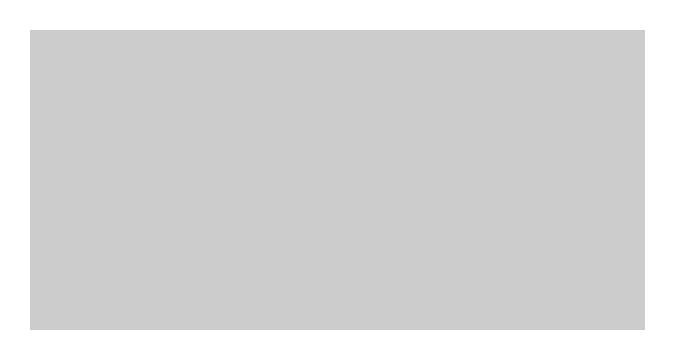

In [10]:
display(SVG('min_svg.svg'))

To make this svg document something we can use with `figurefirst` we need to add a few lines to our svg file. First we need to append the namespace declarations to add  `figurefirst` and  inkscape.
``` xml
<svg
    xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
    xmlns:svg="http://www.w3.org/2000/svg"
    xmlns="http://www.w3.org/2000/svg"
    xmlns:figurefirst="http://flyranch.github.io/figurefirst/"
    xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
    ...
    
``` 
Second, we need to tag the `<rect>` to identify it as an axis by adding a `figurefirst:axis` element so that it is enclosed between `<rect>` and `</rect>`.

```xml
    ....
  <rect
     id="rect4703"
     width="615.0"
     height="300.0"
     x="30.0"
     y="30.0"
     style="fill:#cccccc;stroke:none;">
    <figurefirst:axis
       figurefirst:name="axis1"/>
    </rect>
    ...
```

Note that the `figurefirst:axis` has a `figurefirst:name` attribute. This will identify the axis for us in python. 

Finally, we need to add a target layer for the matplotlib output with the `<figurefist:targetlayer>` tag.

``` xml
  ...
  <g
     inkscape:groupmode="layer"
     id="layer1"
     inkscape:label="Layer 1" >
     <figurefirst:targetlayer
         figurefirst:name='mpl_layer'/>
   </g>
  ...
```
Now we can save this as 'min_layout.svg' and use it to plot.

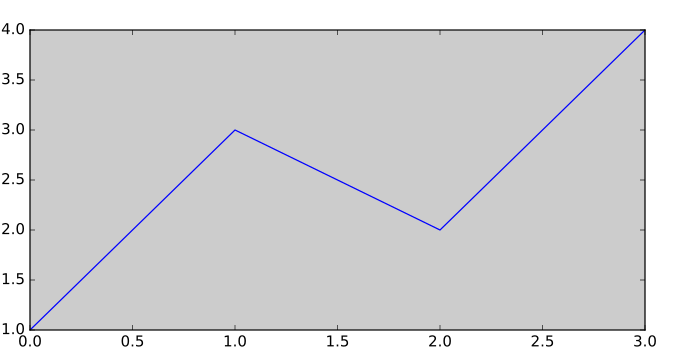

In [11]:
reload(fifi)
layout = fifi.FigureLayout('min_layout.svg')
layout.make_mplfigures()
layout.axes['axis1'].plot([1,3,2,4])
layout.insert_figures()
layout.write_svg('min_test_output.svg')
plt.close('all')
display(SVG('min_test_output.svg'))

# Tricks and tips
- Using groups to control flow in plotting code
- Itteratative design

# Using pathspec and patchspec

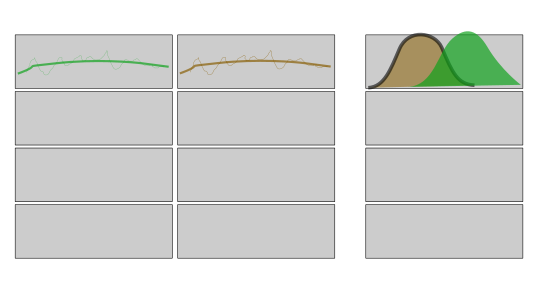

In [12]:
#this is the layout file
display(SVG('../example_pathspec_layout.svg'))

In [13]:
# we collect some data
groupA_mean = 1.5
groupA_sigma = 1.0
groupB_mean = 0.3
groupB_sigma = 0.6
c1_effect = 0.3
c2_effect = 2.0
c3_effect = 0.0
c4_effect = 0.0

data = dict()

N = 500
T = 1.
Delta = T/N
for group_name,group_mean,group_sigma in zip(['A','B'],
                                             [groupA_mean,groupB_mean],
                                             [groupA_sigma,groupB_sigma]):
    data[group_name] = dict()
    for cond_name,cond_effect in zip(['cond_1','cond_2','cond_3','cond_4'],
                                     [c1_effect,c2_effect,c3_effect,c4_effect]):
        data[group_name][cond_name] = list()
        for trial in range(10):
            W = np.zeros(N+1)
            t = np.linspace(0, T, N+1);
            W[:N+1] = cond_effect + group_mean + np.cumsum(np.sqrt(Delta) *
                                                            np.random.standard_normal(N+1) *
                                                            group_sigma)
            t = np.linspace(0, T, N+1);
            data[group_name][cond_name].append(W)

In [14]:
#to remove spines
def kill_spines(ax):
    return fifi.mpl_functions.adjust_spines(ax,'none', 
                  spine_locations={}, 
                  smart_bounds=True, 
                  xticks=None, 
                  yticks=None, 
                  linewidth=1)

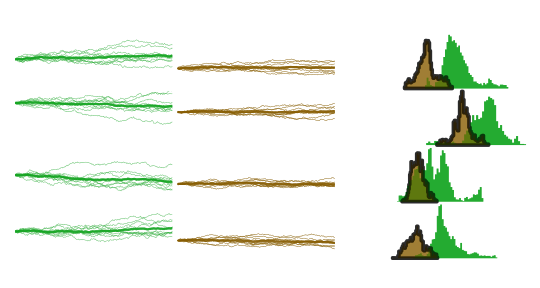

In [15]:
#to remove spines
def kill_spines(ax):
    return fifi.mpl_functions.adjust_spines(ax,'none', 
                  spine_locations={}, 
                  smart_bounds=True, 
                  xticks=None, 
                  yticks=None, 
                  linewidth=1)

## create a layout
layout = fifi.FigureLayout('../example_pathspec_layout.svg')
## make the mpl figure objects
mplfig = layout.make_mplfigures()
## load the line and path specs to get plotting colors and effects
layout.load_pathspecs()
## iterate through what you want to plot and find the needed data,
## not the other way around..
for group_name,group in layout.axes_groups.items():
    if not(group_name == 'summary'):
        for cond_name,cond_ax in group.items():
            group_letter = group_name.split('group')[1]
            kwargs = layout.pathspecs['trial_%s'%group_letter].mplkwargs()
            cond_ax['axis'].plot(np.array(data[group_letter][cond_name]).T,**kwargs)
            
            kill_spines(cond_ax['axis'])
            kwargs = layout.pathspecs['mean_%s'%group_letter].mplkwargs()
            cond_ax['axis'].plot(np.mean(np.array(data[group_letter][cond_name]).T,axis = 1)
                                 ,**kwargs)
            cond_ax['axis'].set_ybound(-2,5)
    else:
        group_letter = 'A'
        kwargs = layout.pathspecs['hist%s'%group_letter].mplkwargs()
        for cond_name,cond_ax in group.items():
            cond_ax['axis'].hist(np.array(data[group_letter][cond_name]).ravel(),
                                 bins = 50,histtype = 'stepfilled',clip_on = False,**kwargs)
            cond_ax['axis'].set_xbound(-2,5)
            kill_spines(cond_ax['axis'])
        group_letter = 'B'
        kwargs = layout.pathspecs['hist%s'%group_letter].mplkwargs()
        for cond_name,cond_ax in group.items():
            cond_ax['axis'].hist(np.array(data[group_letter][cond_name]).ravel(),
                                 bins =50,histtype = 'stepfilled',clip_on = False,**kwargs)
            cond_ax['axis'].set_xbound(-2,5)
            kill_spines(cond_ax['axis'])

## insert the figures into the layout and save
layout.insert_figures()
layout.set_layer_visibility('Layer 1',False)
layout.save('pathspec_test_output.svg')
plt.close('all')
display(SVG('pathspec_test_output.svg'))

In [3]:
layout = fifi.FigureLayout('../example_minimal_multi_fig_multi_ax_layout.svg')

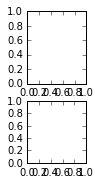

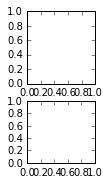

In [4]:
layout.make_mplfigures()

In [8]:
tempfile = StringIO.StringIO('test')

In [10]:
layout.output_xml.writexml(tempfile, encoding='utf-8')

<StringIO.StringIO instance at 0x1091ce290>

In [ ]:
def _fix_mpl_svg(fileob, pattern='miterlimit:100000;', subst='miterlimit:1;'):

    fh, abs_path = tempfile.mkstemp()
    with open(abs_path,'w') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                new_file.write(line.replace(pattern, subst))
    os.close(fh)

    os.remove(file_path)

    shutil.move(abs_path, file_path)
    return

In [28]:
layout.axes_groups['none']['afternoon'].node

KeyError: 'none'

In [25]:
for key,it in layout.axes.items():
    print key,it.node

(u'flowrate_a', u'dusk') <DOM Element: rect at 0x1183ee098>
(u'flowrate_b', u'afternoon') <DOM Element: rect at 0x1183f5560>
(u'flowrate_c', u'dusk') <DOM Element: rect at 0x118402e18>
(u'flowrate_b', u'morning') <DOM Element: rect at 0x1183fe368>
dusk <DOM Element: rect at 0x118402e18>
(u'flowrate_a', u'morning') <DOM Element: rect at 0x1183f2488>
(u'flowrate_b', u'dusk') <DOM Element: rect at 0x1183f5f38>
(u'flowrate_c', u'afternoon') <DOM Element: rect at 0x118402440>
(u'flowrate_b', u'night') <DOM Element: rect at 0x1183fa950>
(u'flowrate_a', u'night') <DOM Element: rect at 0x1183eea70>
(u'flowrate_c', u'night') <DOM Element: rect at 0x118406830>
afternoon <DOM Element: rect at 0x118402440>
night <DOM Element: rect at 0x118406830>
(u'flowrate_a', u'afternoon') <DOM Element: rect at 0x1183e9680>
morning <DOM Element: rect at 0x118409248>
(u'flowrate_c', u'morning') <DOM Element: rect at 0x118409248>
(u'circadian', u'circadian') <DOM Element: rect at 0x1183e6830>
